<a href="https://colab.research.google.com/github/jeongwoo22/ESAA_assignments/blob/main/%EA%B3%BC%EC%A0%9C17_1128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 케라스

1. 하이퍼 파라미터 : 사용자가 직접 설정해주는 설정값
2. 과소적합 & 과대적합 : 학습이 너무 적거나 과하게 된 상태 
3. 에포크 : 모델이 반복 훈련을 할 때 학습에 사용하는 1회 훈련 루프 
4. 손실함수 : 예측값과 정답 값의 차이 or 오차
5. 경사하강법 : 가중치에 대한 미분값을 구해 최소함수 값을 찾는 방법


- 딥러닝 프로세스
1. 데이터 로드 
2. 데이터 전처리
- 특성 공학
- 특성 선택
- 특성 추출 
3. 데이터 분할
4. 모델 생성 & 컴파일
5. 훈련
6. 검증
7. 예측

- 데이터 전처리 : 데이터 가공단계
- 모델 생성 : 모델 구조 정의 및 생성
1. sequential API
2. functional API or Model Subclassing
- 모델 컴파일 : 모델에 사용할 손실함수, 옵티마이저, 평가지표 정의
3. 모델 훈련
4. 모델 검증 및 예측

- Dense 레이어 : 심층 신경망 모델을 구성하는 가장 기본 레이어

In [1]:
# Dense layer 설정 예시
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

In [3]:
import numpy as np
# 데이터 셋 만들기 
x = np.arange(1, 6)

y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


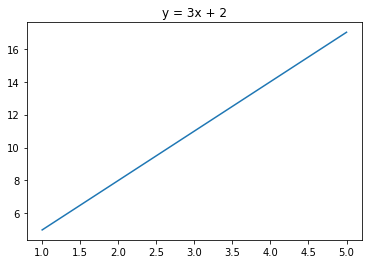

In [4]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

- Sequential API : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

In [6]:
import tensorflow as tf

# 1. 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

# 2. add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [8]:
# 입력 데이터 형태
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]), # [4] 혹은 (4,)
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [9]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# use_bias = True 디폴트로 상수항 b가 추가됨

In [10]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 컴파일

# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

In [13]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 799ms/step - loss: 157.0488 - mae: 11.6729
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 91.5992 - mae: 8.9514
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 53.4579 - mae: 6.8737
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 31.2305 - mae: 5.2875
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 18.2770 - mae: 4.0765


In [14]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 461ms/step - loss: 272.1724 - mae: 15.2664
Epoch 2/1200
1/1 [==============================] - 0s 11ms/step - loss: 158.6473 - mae: 11.6824
Epoch 3/1200
1/1 [==============================] - 0s 10ms/step - loss: 92.4903 - mae: 8.9464
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 53.9370 - mae: 6.8577
Epoch 5/1200
1/1 [==============================] - 0s 8ms/step - loss: 31.4697 - mae: 5.2632
Epoch 6/1200
1/1 [==============================] - 0s 10ms/step - loss: 18.3767 - mae: 4.0458
Epoch 7/1200
1/1 [==============================] - 0s 7ms/step - loss: 10.7465 - mae: 3.1164
Epoch 8/1200
1/1 [==============================] - 0s 6ms/step - loss: 6.2997 - mae: 2.4068
Epoch 9/1200
1/1 [==============================] - 0s 6ms/step - loss: 3.7081 - mae: 1.8650
Epoch 10/1200
1/1 [==============================] - 0s 6ms/step - loss: 2.1976 - mae: 1.4514
Epoch 11/1200
1/1 [==============================] -

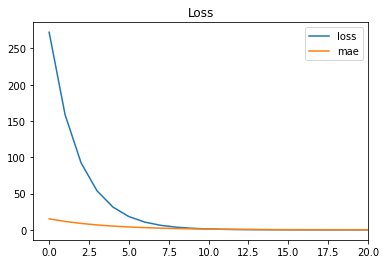

In [15]:
import matplotlib.pyplot as plt
# 20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

In [16]:
# 검증
model.evaluate(x, y) # 별도의 데이터셋 만들어두지 않았으므로 훈련데이터셋의 x, y

1/1 [==============================] - 0s 125ms/step - loss: 2.7841e-05 - mae: 0.0045


[2.784114985843189e-05, 0.004528903868049383]

In [17]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 138ms/step


array([[32.02189]], dtype=float32)

# 케라스 내장 이미지 분류 예제
- 심층 신경망으로 이미지 분류 모델 생성

In [18]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist


In [19]:
# load_data()로 데이터셋 로드
# 훈련 셋과 검증 셋을 반환
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


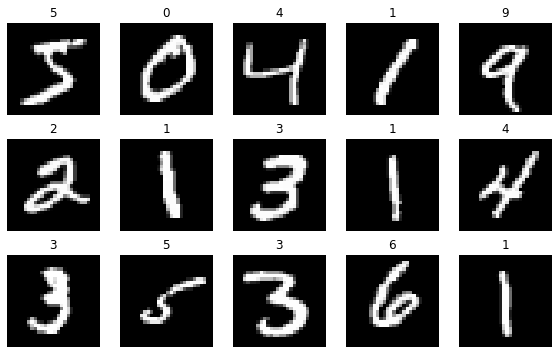

In [21]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

- 데이터 전처리

In [22]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [23]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [24]:
# test 셋에도 정규화 동일 적용
x_test = x_test/x_test.max()

# 변환후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

- flatten 레이어 

In [25]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [26]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


- 활성화 함수 

In [27]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10개까지 정보를 축약하기 위한 설계
# 레이어의 개수(모델의 깊이)와 각 레이어를 구성하는 노드의 개수(모델의 너비)의 정답은 없으며 최적값을 찾기 위해서는 여러가지 시도를 해보아야 함


In [29]:
# 출력층 노드 = 1인 경우. sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우. softmax
tf.keras.layers.Dense(10, activation='softmax')

- 손실함수

In [30]:
# 이진분류(출력노드개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [31]:
# y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

- 옵티 마이저 : 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

In [32]:
# 클래스 인스터스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


- 평가지표

In [33]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- 훈련

In [34]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2323 - accuracy: 0.9317 - val_loss: 0.1206 - val_accuracy: 0.9634
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0966 - accuracy: 0.9704 - val_loss: 0.0988 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0937 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0818 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0825 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0767 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0930 - val_accuracy:

- 평가

In [35]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)
print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9725
검증 셋 정확도: 0.9725000262260437


- 예측

In [36]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [37]:
# 예측 결과 출력
predictions[0]


array([1.15810925e-08, 5.69977239e-08, 3.39079662e-08, 6.40899001e-04,
       1.72105741e-09, 6.30942509e-07, 3.54310366e-18, 9.98933852e-01,
       1.21331624e-07, 4.24455560e-04], dtype=float32)

In [38]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


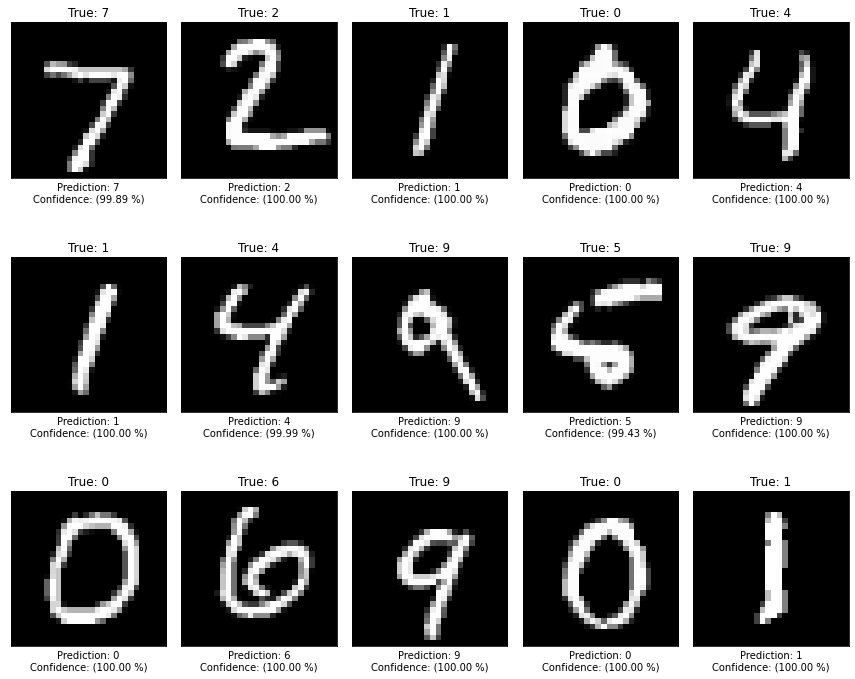

In [39]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imgshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()